# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1.
Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$



Tiempo de encuentro: 10.00 s


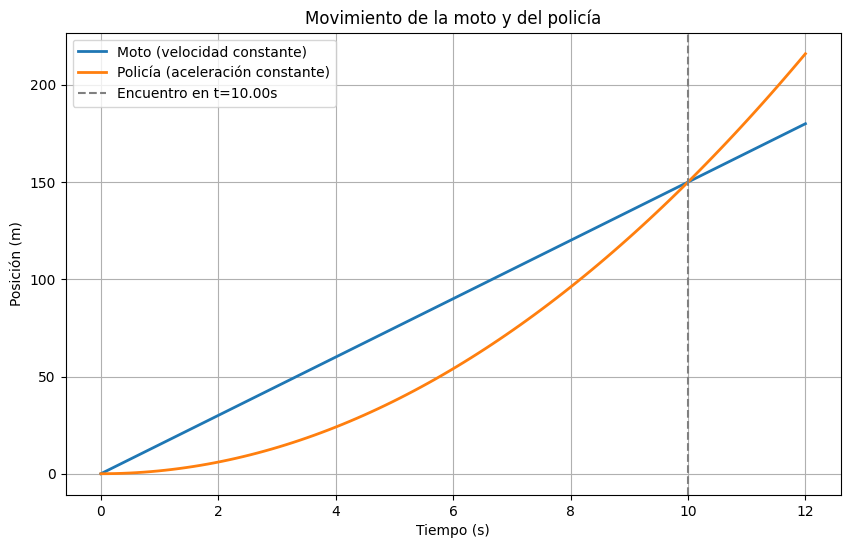

In [ ]:

# Datos dados
vm = 15
ap = 3

t_encuentro = 2 * vm / ap  # derivado de: vm * t = 0.5 * ap * t²
print(f"Tiempo de encuentro: {t_encuentro:.2f} s")

t = np.linspace(0, t_encuentro + 2, 100)

# Posición en función del tiempo
x_moto = vm * t
x_policia = 0.5 * ap * t**2

plt.figure(figsize=(10, 6))
plt.plot(t, x_moto, label='Moto (velocidad constante)', linewidth=2)
plt.plot(t, x_policia, label='Policía (aceleración constante)', linewidth=2)
plt.axvline(t_encuentro, color='gray', linestyle='--', label=f'Encuentro en t={t_encuentro:.2f}s')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.title('Movimiento de la moto y del policía')
plt.legend()
plt.grid()
plt.show()


---

##2.
El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/6}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/6}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.




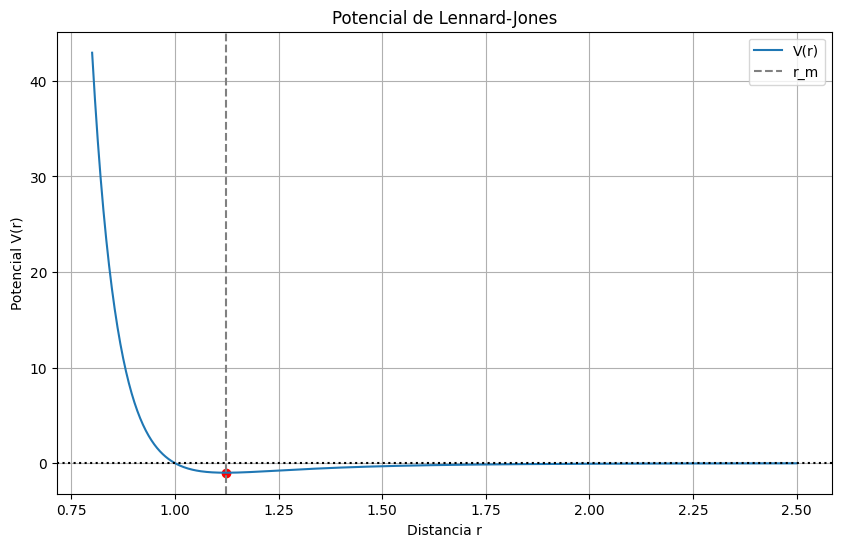

sigma = 0.8, r_m = 0.8980, V_rm = -1.0000
sigma = 1.0, r_m = 1.1225, V_rm = -1.0000
sigma = 1.2, r_m = 1.3470, V_rm = -1.0000
sigma = 1.5, r_m = 1.6837, V_rm = -1.0000


In [ ]:

def Potencial_LJ(r, epsilon=1, sigma=1):
    '''
    Funcion del potencia LJ
    '''
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

epsilon = 1
sigma = 1
r = np.linspace(0.8, 2.5 * sigma, 500)  # Truncamiento en rc = 2.5 * sigma
V = Potencial_LJ(r, epsilon, sigma)


r_min = 2**(1/6) * sigma
V_min = Potencial_LJ(r_min, epsilon, sigma)

# Gráfica del potencial
plt.figure(figsize=(10, 6))
plt.plot(r, V, label=r'V(r)')
plt.axvline(r_min, color='gray', linestyle='--', label=fr'r_m')
plt.axhline(0, color='black', linestyle=':')
plt.scatter(r_min, V_min, color='red')
plt.title("Potencial de Lennard-Jones")
plt.xlabel("Distancia r")
plt.ylabel("Potencial V(r)")
plt.legend()
plt.grid(True)
plt.show()

# c. Verificación para diferentes valores de sigma
sigmas = [0.8, 1.0, 1.2, 1.5]
for sigma in sigmas:
    r_m = 2**(1/6) * sigma
    V_rm = Potencial_LJ(r_m, epsilon, sigma)
    print(f"sigma = {sigma}, r_m = {r_m:.4f}, V_rm = {V_rm:.4f}")

##3.  
El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres de las columnas al español.

b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños (cm) y niñas (cm) en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.


Index(['Unnamed: 0', 'Country', 'Average Height, Boys, 19 yo (cm)↓',
       'Girls 19 (cm)', 'Boys 19 (in)', 'Girls 19 (in)'],
      dtype='object')
   Rank                    País  Niños (cm)  Niñas (cm)  \
0   NaN             Netherlands         184         170   
1   NaN              Montenegro         183         170   
2   NaN                 Estonia         183         169   
3   NaN  Bosnia and Herzegovina         182         167   
4   NaN                 Iceland         182         169   

  Diferencia Niño-Niña (cm)       Fuente  
0                     6 ft.  5 ft. 7 in.  
1                     6 ft.  5 ft. 7 in.  
2                     6 ft.  5 ft. 6 in.  
3                     6 ft.  5 ft. 6 in.  
4                     6 ft.  5 ft. 7 in.  
   País Riqueza Promedio (USD)    prueba   prueba2  prueba3 prueba4
0   NaN            Switzerland  $685,226  $120,431    $4.8T    1.1%
1   NaN             Luxembourg  $585,950  $163,432    $299B    0.1%
2   NaN          United States  $5

<Figure size 1400x700 with 0 Axes>

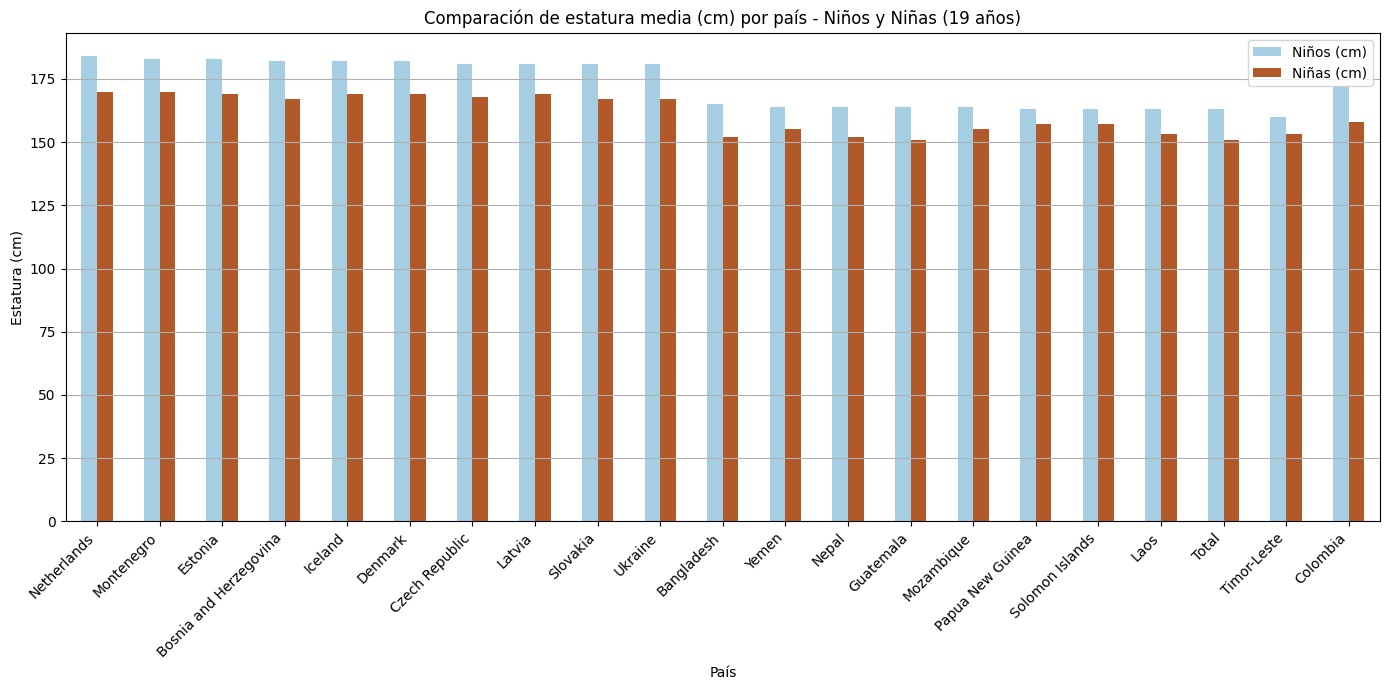

In [ ]:
import seaborn as sns

#Dataset de alturas
url_alturas = "https://worldpopulationreview.com/country-rankings/average-height-by-country"
alturas = pd.read_html(url_alturas)[0]

print(alturas.columns)


alturas.columns = ['Rank', 'País', 'Niños (cm)', 'Niñas (cm)', 'Diferencia Niño-Niña (cm)', 'Fuente']

# Dataset de riqueza
url_income = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"
income = pd.read_html(url_income)[0]

income.columns = ['País', 'Riqueza Promedio (USD)',"prueba", "prueba2","prueba3","prueba4"]

print(alturas.head())
print(income.head())
# se organizan
alturas['Niños (cm)'] = pd.to_numeric(alturas['Niños (cm)'], errors='coerce')
alturas['Niñas (cm)'] = pd.to_numeric(alturas['Niñas (cm)'], errors='coerce')
alturas_sorted = alturas.sort_values(by='Niños (cm)', ascending=False)

# los primeros 10
top10 = alturas_sorted.head(10)

# los ultimos 10
bajos10 = alturas_sorted.tail(10)

colombia = alturas[alturas['País'] == 'Colombia']

seleccion = pd.concat([top10, bajos10, colombia])

# Gráfico
plt.figure(figsize=(14, 7))
seleccion_plot = seleccion.set_index('País')[['Niños (cm)', 'Niñas (cm)']]
seleccion_plot.plot(kind='bar', figsize=(14, 7), colormap='Paired')

plt.title("Comparación de estatura media (cm) por país - Niños y Niñas (19 años)")
plt.ylabel("Estatura (cm)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()